In [ ]:
import os
import random
from shutil import copyfile
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
class_labels=['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']

In [ ]:
!kaggle datasets download -d jehanbhathena/weather-dataset

 97% 571M/587M [00:03<00:00, 206MB/s]
100% 587M/587M [00:03<00:00, 157MB/s]


In [ ]:
# Unzip  dataset
from zipfile import ZipFile
file_name = "/content/weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


done


In [ ]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [ ]:
#create three folders (train and validation and test)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#Under train folder create five folders
# (cloud, folly, rainy, shine, sunrise)

train_dew_dir = os.path.join(train_dir, 'dew')
os.mkdir(train_dew_dir)

train_fogsmog_dir= os.path.join(train_dir, 'fogsmog')
os.mkdir(train_fogsmog_dir)

train_frost_dir = os.path.join(train_dir, 'frost')
os.mkdir(train_frost_dir)

train_glaze_dir = os.path.join(train_dir, 'glaze')
os.mkdir(train_glaze_dir)

train_hail_dir = os.path.join(train_dir, 'hail')
os.mkdir(train_hail_dir)

train_lightning_dir= os.path.join(train_dir, 'lightning')
os.mkdir(train_lightning_dir)

train_rain_dir = os.path.join(train_dir, 'rain')
os.mkdir(train_rain_dir)

train_rainbow_dir = os.path.join(train_dir, 'rainbow')
os.mkdir(train_rainbow_dir)

train_rime_dir = os.path.join(train_dir, 'rime')
os.mkdir(train_rime_dir)

train_sandstorm_dir = os.path.join(train_dir, 'sandstorm')
os.mkdir(train_sandstorm_dir)

train_snow_dir = os.path.join(train_dir, 'snow')
os.mkdir(train_snow_dir)

#Under validation folder create five folders
# (cloud, folly, rainy, shine, sunrise)

validation_dew_dir = os.path.join(validation_dir, 'dew')
os.mkdir(validation_dew_dir)

validation_fogsmog_dir= os.path.join(validation_dir, 'fogsmog')
os.mkdir(validation_fogsmog_dir)

validation_frost_dir = os.path.join(validation_dir, 'frost')
os.mkdir(validation_frost_dir)

validation_glaze_dir = os.path.join(validation_dir, 'glaze')
os.mkdir(validation_glaze_dir)

validation_hail_dir = os.path.join(validation_dir, 'hail')
os.mkdir(validation_hail_dir)

validation_lightning_dir= os.path.join(validation_dir, 'lightning')
os.mkdir(validation_lightning_dir)

validation_rain_dir = os.path.join(validation_dir, 'rain')
os.mkdir(validation_rain_dir)

validation_rainbow_dir = os.path.join(validation_dir, 'rainbow')
os.mkdir(validation_rainbow_dir)

validation_rime_dir = os.path.join(validation_dir, 'rime')
os.mkdir(validation_rime_dir)

validation_sandstorm_dir = os.path.join(validation_dir, 'sandstorm')
os.mkdir(validation_sandstorm_dir)

validation_snow_dir = os.path.join(validation_dir, 'snow')
os.mkdir(validation_snow_dir)

# test set

test_dew_dir = os.path.join(test_dir, 'dew')
os.mkdir(test_dew_dir)

test_fogsmog_dir= os.path.join(test_dir, 'fogsmog')
os.mkdir(test_fogsmog_dir)

test_frost_dir = os.path.join(test_dir, 'frost')
os.mkdir(test_frost_dir)

test_glaze_dir = os.path.join(test_dir, 'glaze')
os.mkdir(test_glaze_dir)

test_hail_dir = os.path.join(test_dir, 'hail')
os.mkdir(test_hail_dir)

test_lightning_dir= os.path.join(test_dir, 'lightning')
os.mkdir(test_lightning_dir)

test_rain_dir = os.path.join(test_dir, 'rain')
os.mkdir(test_rain_dir)

test_rainbow_dir = os.path.join(test_dir, 'rainbow')
os.mkdir(test_rainbow_dir)

test_rime_dir = os.path.join(test_dir, 'rime')
os.mkdir(test_rime_dir)

test_sandstorm_dir = os.path.join(test_dir, 'sandstorm')
os.mkdir(test_sandstorm_dir)

test_snow_dir = os.path.join(test_dir, 'snow')
os.mkdir(test_snow_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION,TEST):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * 0.80)
    valid_length = int(len(files) * 0.10)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:training_length+valid_length]
    test_set=shuffled_set[training_length+valid_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)

In [ ]:

dew_SOURCE_DIR = '/content/dataset/dew/'
TRAINING_dew_DIR = '/content/weather-data/train/dew/'
VALID_dew_DIR = '/content/weather-data/validation/dew/'
TEST_dew_DIR='/content/weather-data/test/dew/'

fogsmog_SOURCE_DIR = '/content/dataset/fogsmog/'
TRAINING_fogsmog_DIR = '/content/weather-data/train/fogsmog/'
VALID_fogsmog_DIR = '/content/weather-data/validation/fogsmog/'
TEST_fogsmog_DIR='/content/weather-data/test/fogsmog/'

frost_SOURCE_DIR = '/content/dataset/frost/'
TRAINING_frost_DIR = '/content/weather-data/train/frost/'
VALID_frost_DIR = '/content/weather-data/validation/frost/'
TEST_frost_DIR='/content/weather-data/test/frost/'

glaze_SOURCE_DIR = '/content/dataset/glaze/'
TRAINING_glaze_DIR = '/content/weather-data/train/glaze/'
VALID_glaze_DIR = '/content/weather-data/validation/glaze/'
TEST_glaze_DIR='/content/weather-data/test/glaze/'


hail_SOURCE_DIR = '/content/dataset/hail/'
TRAINING_hail_DIR = '/content/weather-data/train/hail/'
VALID_hail_DIR = '/content/weather-data/validation/hail/'
TEST_hail_DIR='/content/weather-data/test/hail/'


lightning_SOURCE_DIR = '/content/dataset/lightning/'
TRAINING_lightning_DIR = '/content/weather-data/train/lightning/'
VALID_lightning_DIR = '/content/weather-data/validation/lightning/'
TEST_lightning_DIR='/content/weather-data/test/lightning/'


rain_SOURCE_DIR = '/content/dataset/rain/'
TRAINING_rain_DIR = '/content/weather-data/train/rain/'
VALID_rain_DIR = '/content/weather-data/validation/rain/'
TEST_rain_DIR='/content/weather-data/test/rain/'


rainbow_SOURCE_DIR = '/content/dataset/rainbow/'
TRAINING_rainbow_DIR = '/content/weather-data/train/rainbow/'
VALID_rainbow_DIR = '/content/weather-data/validation/rainbow/'
TEST_rainbow_DIR='/content/weather-data/test/rainbow/'


rime_SOURCE_DIR = '/content/dataset/rime/'
TRAINING_rime_DIR = '/content/weather-data/train/rime/'
VALID_rime_DIR = '/content/weather-data/validation/rime/'
TEST_rime_DIR='/content/weather-data/test/rime/'


sandstorm_SOURCE_DIR = '/content/dataset/sandstorm/'
TRAINING_sandstorm_DIR = '/content/weather-data/train/sandstorm/'
VALID_sandstorm_DIR = '/content/weather-data/validation/sandstorm/'
TEST_sandstorm_DIR='/content/weather-data/test/sandstorm/'


snow_SOURCE_DIR = '/content/dataset/snow/'
TRAINING_snow_DIR = '/content/weather-data/train/snow/'
VALID_snow_DIR = '/content/weather-data/validation/snow/'
TEST_snow_DIR='/content/weather-data/test/snow/'

In [ ]:
split_data(dew_SOURCE_DIR, TRAINING_dew_DIR, VALID_dew_DIR, TEST_dew_DIR)
split_data(fogsmog_SOURCE_DIR, TRAINING_fogsmog_DIR, VALID_fogsmog_DIR, TEST_fogsmog_DIR)
split_data(frost_SOURCE_DIR, TRAINING_frost_DIR, VALID_frost_DIR, TEST_frost_DIR)
split_data(glaze_SOURCE_DIR, TRAINING_glaze_DIR, VALID_glaze_DIR, TEST_glaze_DIR)
split_data(hail_SOURCE_DIR, TRAINING_hail_DIR, VALID_hail_DIR, TEST_hail_DIR)
split_data(lightning_SOURCE_DIR, TRAINING_lightning_DIR, VALID_lightning_DIR, TEST_lightning_DIR)
split_data(rain_SOURCE_DIR, TRAINING_rain_DIR, VALID_rain_DIR, TEST_rain_DIR)
split_data(rainbow_SOURCE_DIR, TRAINING_rainbow_DIR, VALID_rainbow_DIR, TEST_rainbow_DIR)
split_data(rime_SOURCE_DIR, TRAINING_rime_DIR, VALID_rime_DIR, TEST_rime_DIR)
split_data(sandstorm_SOURCE_DIR, TRAINING_sandstorm_DIR, VALID_sandstorm_DIR, TEST_sandstorm_DIR)
split_data(snow_SOURCE_DIR, TRAINING_snow_DIR, VALID_snow_DIR, TEST_snow_DIR)


In [ ]:
def show_image_count(path):
  image_folder = ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']
  nimgs = {}
  for i in image_folder:
    nimages = len(os.listdir(path+'/'+i+'/'))
    nimgs[i]=nimages
  plt.figure(figsize=(9, 6))
  plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
  plt.xticks(range(len(nimgs)), list(nimgs.keys()))
  plt.title('Distribution of different classes in Dataset')
  plt.show()

  total=0
  for i in ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']:
      x=len(os.listdir(path+'/'+i+'/'))
      total+=x
      print(' {} images are: '.format(i)+str(x))

  print('Total   images  '+str(total))

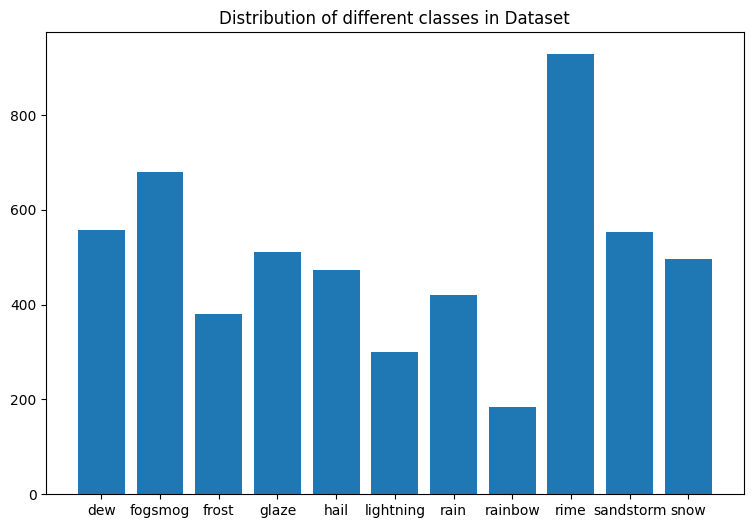

 dew images are: 558
 fogsmog images are: 680
 frost images are: 380
 glaze images are: 511
 hail images are: 472
 lightning images are: 301
 rain images are: 420
 rainbow images are: 185
 rime images are: 928
 sandstorm images are: 553
 snow images are: 496
Total   images  5484


In [ ]:
show_image_count('/content/weather-data/train')

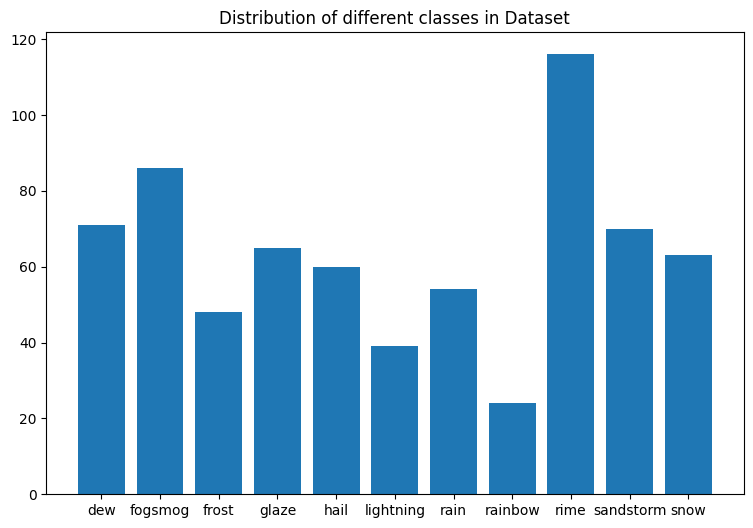

 dew images are: 71
 fogsmog images are: 86
 frost images are: 48
 glaze images are: 65
 hail images are: 60
 lightning images are: 39
 rain images are: 54
 rainbow images are: 24
 rime images are: 116
 sandstorm images are: 70
 snow images are: 63
Total   images  696


In [ ]:
show_image_count('/content/weather-data/test')

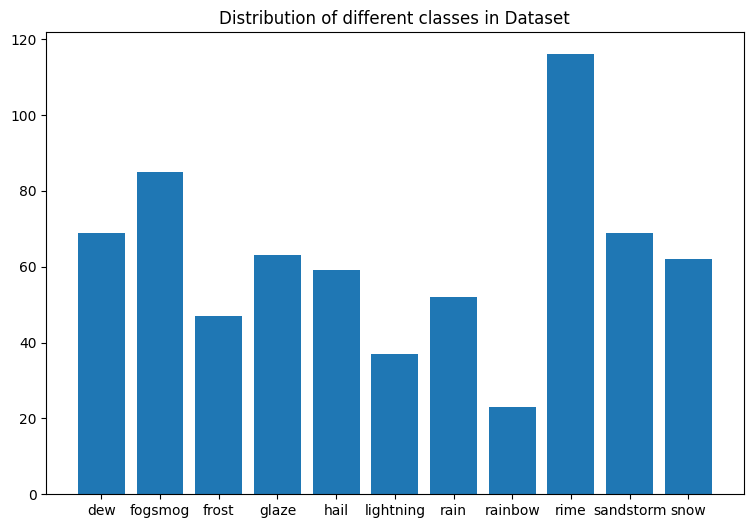

 dew images are: 69
 fogsmog images are: 85
 frost images are: 47
 glaze images are: 63
 hail images are: 59
 lightning images are: 37
 rain images are: 52
 rainbow images are: 23
 rime images are: 116
 sandstorm images are: 69
 snow images are: 62
Total   images  682


In [ ]:
show_image_count('/content/weather-data/validation')


In [ ]:
img_width=224; img_height=224
batch_size=64

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
cov_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width,img_height,3)

)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
cov_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
cov_base.trainable=False

In [ ]:
model1=Sequential()
model1.add(cov_base)
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(11,activation='softmax'))

In [ ]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 21,140,299
Trainable params: 6,425,611
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

train_dir="/content/weather-data/train"
test_dir="/content/weather-data/test"
valid_dir="/content/weather-data/validation"

train_datagetn=ImageDataGenerator(rescale=1/224.0,
                                  rotation_range=30,
                                  zoom_range=0.4,
                                  horizontal_flip=True)

train_data_set=train_datagetn.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(img_height,img_width)

)

val_datagen=ImageDataGenerator(rescale=1/224.0)

val_data_set=val_datagen.flow_from_directory(
    valid_dir,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(img_height,img_width)
)


callback=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')


best_model_file_path="/content/model.h5"

best_model=ModelCheckpoint(best_model_file_path,monitor="val_accuracy",verbose=1,save_best_only=True)



Found 5484 images belonging to 11 classes.
Found 682 images belonging to 11 classes.


In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
histor=model1.fit(train_data_set,epochs=20,verbose=1,validation_data=val_data_set,callbacks=[best_model])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.5447 - accuracy: 0.8074
Epoch 1: val_accuracy improved from -inf to 0.81378, saving model to /content/model.h5
86/86 [==============================] - 88s 1s/step - loss: 0.5447 - accuracy: 0.8074 - val_loss: 0.5516 - val_accuracy: 0.8138
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.4769 - accuracy: 0.8333
Epoch 2: val_accuracy improved from 0.81378 to 0.82991, saving model to /content/model.h5
86/86 [==============================] - 87s 1s/step - loss: 0.4769 - accuracy: 0.8333 - val_loss: 0.5365 - val_accuracy: 0.8299
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.8397
Epoch 3: val_accuracy improved from 0.82991 to 0.83578, saving model to /content/model.h5
86/86 [==============================] - 89s 1s/step - loss: 0.4644 - accuracy: 0.8397 - val_loss: 0.5160 - val_accuracy: 0.8358
Epoch 4/20
86/86 [==============================] - ETA: 0s - lo

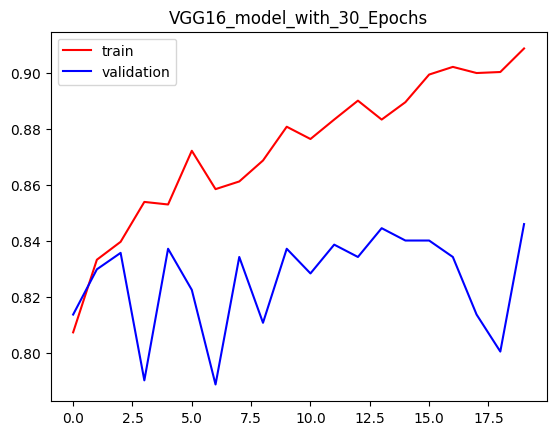

In [ ]:
plt.plot(histor.history['accuracy'],color='red',label='train')
plt.plot(histor.history['val_accuracy'],color='blue',label='validation')
plt.title('VGG16_model_with_30_Epochs')
plt.legend()
plt.show()

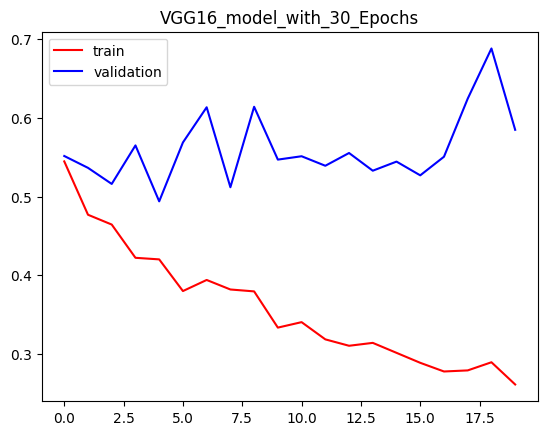

In [ ]:
plt.plot(histor.history['loss'],color='red',label='train')
plt.plot(histor.history['val_loss'],color='blue',label='validation')
plt.title('VGG16_model_with_30_Epochs')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
SOURCE='/content/weather-data/test/'
y_true=[]
y_pred=[]
k=0
for i in ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']:
  Src=SOURCE+i+'/'
  for filename in os.listdir(Src):
        img=cv2.imread(Src+filename)
        resize=tf.image.resize(img,(224,224))
        np.expand_dims(resize,0)
        yp=model1.predict(np.expand_dims(resize/224,0))
        answer = np.argmax(yp)
        y_pred.append(answer)
        y_true.append(k)
  k=k+1

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_pred=np.array(y_pred)
y_true=np.array(y_true)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat = np.array(conf_mat)

In [ ]:
print("VGG16_model_with_30_Epochs Accuracy : ",accuracy_score(y_true,y_pred))

VGG16_model_with_30_Epochs Accuracy :  0.7011494252873564


In [ ]:
import itertools
def plot_confusion_matrix(cm, classses,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classses))
    plt.xticks(tick_marks, classses, rotation=45)
    plt.yticks(tick_marks, classses)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

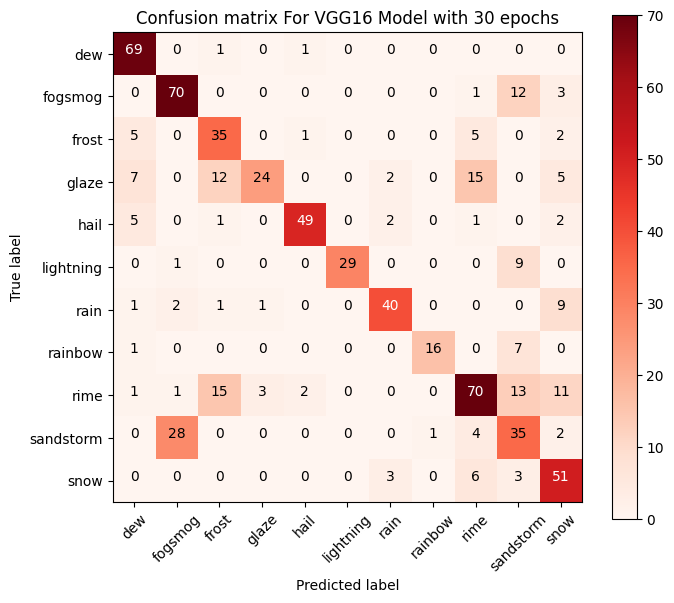

In [ ]:
import numpy as np
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, class_labels, title='Confusion matrix For VGG16 Model with 30 epochs')
plt.show()


In [ ]:
#VGG 19 model

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
image_size=[150,150]

In [ ]:
train_datagetn=ImageDataGenerator(rescale=1/224.0,
                                  rotation_range=30,
                                  zoom_range=0.4,
                                  horizontal_flip=True)

train_data_set=train_datagetn.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150,150)

)

val_datagen=ImageDataGenerator(rescale=1/224.0)

val_data_set=val_datagen.flow_from_directory(
    valid_dir,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(150,150 )
)


callback=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')


best_model_file_path="/content/model_vgg19.h5"

best_model=ModelCheckpoint(best_model_file_path,monitor="val_accuracy",verbose=1,save_best_only=True)


Found 5484 images belonging to 11 classes.
Found 682 images belonging to 11 classes.


In [ ]:
model_vgg19=VGG19(input_shape=image_size+[3],weights='imagenet',include_top=False)


In [ ]:
for layer in model_vgg19.layers:
  layer.trainable=False

model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model2=Sequential()
model2.add(model_vgg19)
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(11,activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 11)                2827      
                                                                 
Total params: 22,124,619
Trainable params: 2,100,235
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
histor1=model2.fit(train_data_set,epochs=20,verbose=1,validation_data=val_data_set,callbacks=[best_model])

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.9447 - accuracy: 0.6696
Epoch 1: val_accuracy improved from -inf to 0.72287, saving model to /content/model_vgg19.h5
86/86 [==============================] - 50s 584ms/step - loss: 0.9447 - accuracy: 0.6696 - val_loss: 0.8292 - val_accuracy: 0.7229
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.8013 - accuracy: 0.7210
Epoch 2: val_accuracy improved from 0.72287 to 0.76540, saving model to /content/model_vgg19.h5
86/86 [==============================] - 51s 587ms/step - loss: 0.8013 - accuracy: 0.7210 - val_loss: 0.7261 - val_accuracy: 0.7654
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.7480
Epoch 3: val_accuracy did not improve from 0.76540
86/86 [==============================] - 50s 583ms/step - loss: 0.7166 - accuracy: 0.7480 - val_loss: 0.6779 - val_accuracy: 0.7639
Epoch 4/20
86/86 [==============================] - ETA: 0s - loss: 0.6714 - accur

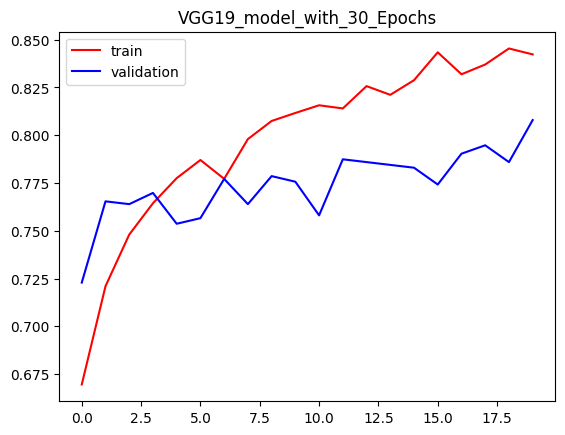

In [ ]:
plt.plot(histor1.history['accuracy'],color='red',label='train')
plt.plot(histor1.history['val_accuracy'],color='blue',label='validation')
plt.title('VGG19_model_with_30_Epochs')
plt.legend()
plt.show()

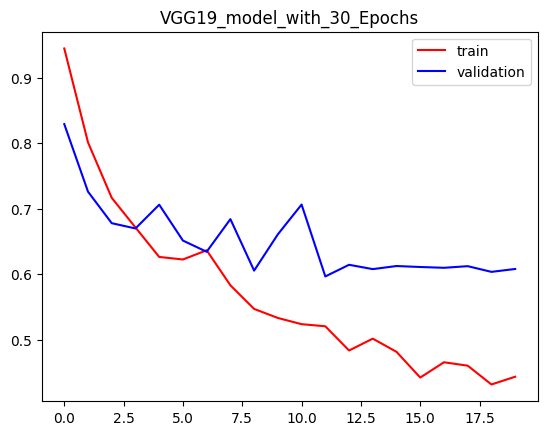

In [ ]:
plt.plot(histor1.history['loss'],color='red',label='train')
plt.plot(histor1.history['val_loss'],color='blue',label='validation')
plt.title('VGG19_model_with_30_Epochs')
plt.legend()
plt.show()

In [ ]:
import cv2
import numpy as np
SOURCE='/content/weather-data/test/'
y_true=[]
y_pred=[]
k=0
for i in ['dew','fogsmog','frost','glaze','hail','lightning','rain','rainbow','rime','sandstorm','snow']:
  Src=SOURCE+i+'/'
  for filename in os.listdir(Src):
        img=cv2.imread(Src+filename)
        resize=tf.image.resize(img,(150,150))
        np.expand_dims(resize,0)
        yp=model2.predict(np.expand_dims(resize/150,0))
        answer = np.argmax(yp)
        y_pred.append(answer)
        y_true.append(k)
  k=k+1

1/1 [==============================] - 0s 34ms/step


In [ ]:
y_pred=np.array(y_pred)
y_true=np.array(y_true)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat = np.array(conf_mat)

In [ ]:
print("VGG19_model_with_30_Epochs Accuracy : ",accuracy_score(y_true,y_pred))

VGG19_model_with_30_Epochs Accuracy :  0.6910919540229885


In [ ]:
import itertools
def plot_confusion_matrix(cm, classses,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classses))
    plt.xticks(tick_marks, classses, rotation=45)
    plt.yticks(tick_marks, classses)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

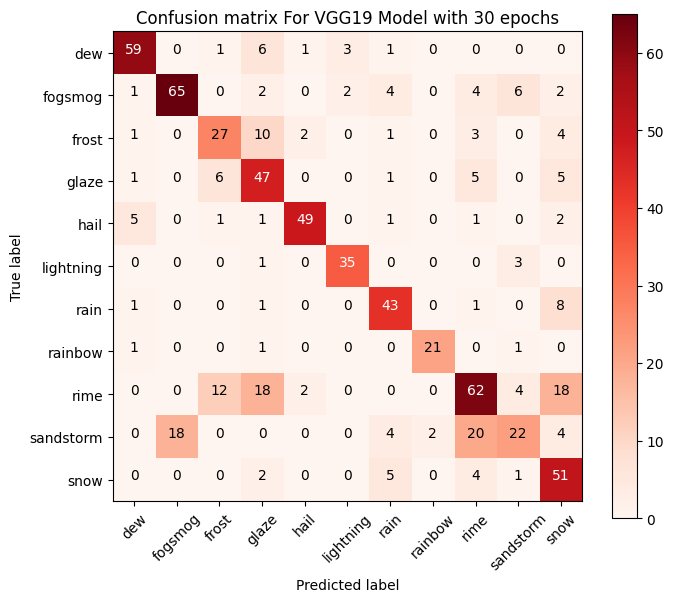

In [ ]:
import numpy as np
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, class_labels, title='Confusion matrix For VGG19 Model with 30 epochs')
plt.show()
